In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
from matplotlib import gridspec
import cmath
import scipy as scipy
from mpl_toolkits.mplot3d import Axes3D
from plot_utils import save_fig
from matplotlib.colors import ListedColormap
import tikzplotlib
# plot settings
rc('axes', linewidth=3)
rc('text', usetex=True)
rc('font', size=24, family='arial', weight='bold')
rc('lines',linewidth=1.5,color='blue')
rc('xtick.major', pad=10, size=5, width=3)
rc('ytick.major', pad=10, size=5, width=3)

In [14]:
#df = pd.read_csv(r'./All_data.dat' , delimiter='  ', skip_blank_lines=True)

df = pd.read_csv(r'./../06_data/20220124_all_data.dat', delimiter='  ', skip_blank_lines=True)
df64=pd.read_csv ("./../02_DMRG/L_64/L_64_data_for_panda_extended.csv",header=None)
df64.sort_values(by=[0])
df64 = df64.transpose()
df64.rename(columns=df64.iloc[0], inplace = True)
df64.drop([0], inplace = True)

df32=pd.read_csv ("./../02_DMRG/L_32/32_collected_data.csv",header=None)
df32.sort_values(by=[0])
df32 = df32.transpose()
df32.rename(columns=df32.iloc[0], inplace = True)
df32.drop([0], inplace = True)


/home/pkrah/Software/miniconda3/envs/sPOD/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [15]:
df = df.sort_values(by=['bondD'], ascending=False)
df = df.reset_index()  # make sure indexes pair with number of rows
data = []
matching_attributes = ["Lx","lambda","mu_y","theta"]
for index, row in df.iterrows():
    row_is_in_data=False
    for d in data:
        count = 0
        for key in matching_attributes:
            #print(key,d[key],row[key])
            if d[key]==row[key]:
                count +=1
            else:
                break
        
        #print(" ")
        if count == len(matching_attributes):
            row_is_in_data=True
            break
    
    if not row_is_in_data:
        data.append(row)

In [16]:
df2 = pd.DataFrame(data)
#print(df2)

In [17]:
#df.sort_values(by=['Lx'])
lattsizes = df.Lx.to_numpy()
lattsizes = np.unique(lattsizes)
print(lattsizes)
#print(df.Lx)

[ 3  4  8 10 12 16 20 24]


In [18]:
tempMU  = np.array(df[(df['Lx']==3)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==3)]['winding']);
tempEN  = np.array(df[(df['Lx']==3)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==3)]['MA']);  tempMB  = np.array(df[(df['Lx']==3)]['MB']);
indL3   = tempMU.argsort();
L3mu = tempMU[indL3]; L3Wind = tempWIN[indL3]; L3energy = tempEN[indL3];
L3MA = tempMA[indL3]; L3MB = tempMB[indL3];
#
tempMU  = np.array(df[(df['Lx']==4)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==4)]['winding']);
tempEN  = np.array(df[(df['Lx']==4)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==4)]['MA']);  tempMB  = np.array(df[(df['Lx']==4)]['MB']);
indL4   = tempMU.argsort();
L4mu = tempMU[indL4]; L4Wind = tempWIN[indL4]; L4energy = tempEN[indL4];
L4MA = tempMA[indL4]; L4MB = tempMB[indL4];
#
tempMU  = np.array(df[(df['Lx']==8)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==8)]['winding']);
tempEN  = np.array(df[(df['Lx']==8)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==8)]['MA']);  tempMB  = np.array(df[(df['Lx']==8)]['MB']);
indL8   = tempMU.argsort();
L8mu = tempMU[indL8]; L8Wind = tempWIN[indL8]; L8energy = tempEN[indL8];
L8MA = tempMA[indL8]; L8MB = tempMB[indL8];
#
tempMU  = np.array(df[(df['Lx']==10)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==10)]['winding']);
tempEN  = np.array(df[(df['Lx']==10)]['Energy_GS']); 
tempMA  = np.array(df[(df['Lx']==10)]['MA']);  tempMB  = np.array(df[(df['Lx']==10)]['MB']);
indL10  = tempMU.argsort();
L10mu = tempMU[indL10]; L10Wind = tempWIN[indL10]; L10energy = tempEN[indL10];
L10MA = tempMA[indL10]; L10MB = tempMB[indL10];
#
tempMU  = np.array(df[(df['Lx']==12)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==12)]['winding']);
tempEN  = np.array(df[(df['Lx']==12)]['Energy_GS']); 
tempMA  = np.array(df[(df['Lx']==12)]['MA']);  tempMB  = np.array(df[(df['Lx']==12)]['MB']);
indL12  = tempMU.argsort();
L12mu = tempMU[indL12]; L12Wind = tempWIN[indL12]; L12energy = tempEN[indL12];
L12MA = tempMA[indL12]; L12MB = tempMB[indL12];
#
tempMU  = np.array(df[(df['Lx']==16)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==16)]['winding']);
tempEN  = np.array(df[(df['Lx']==16)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==16)]['MA']);  tempMB  = np.array(df[(df['Lx']==16)]['MB']);
indL16  = tempMU.argsort();
L16mu = tempMU[indL16]; L16Wind = tempWIN[indL16]; L16energy = tempEN[indL16];
L16MA = tempMA[indL16]; L16MB = tempMB[indL16];
#
tempMU  = np.array(df[(df['Lx']==20)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==20)]['winding']);
tempEN  = np.array(df[(df['Lx']==20)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==20)]['MA']);  tempMB  = np.array(df[(df['Lx']==20)]['MB']);
indL20  = tempMU.argsort();
L20mu = tempMU[indL20]; L20Wind = tempWIN[indL20]; L20energy = tempEN[indL20];
L20MA = tempMA[indL20]; L20MB = tempMB[indL20];
#
tempMU  = np.array(df[(df['Lx']==24)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==24)]['winding']);
tempEN  = np.array(df[(df['Lx']==24)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==24)]['MA']);  tempMB  = np.array(df[(df['Lx']==24)]['MB']);
indL24  = tempMU.argsort();
L24mu = tempMU[indL24]; L24Wind = tempWIN[indL24]; L24energy = tempEN[indL24];
L24MA = tempMA[indL24]; L24MB = tempMB[indL24];
#
tempMU = df64.columns[0:57]
tempWIN=np.zeros(np.size(df64.columns))
for idx in range(1,np.size(df64.columns),1):
    tempWIN[idx]=np.sum(df64[df64.columns[idx]])
#tempEN  = np.array(df[(df['Lx']==24)]['Energy_GS']);
#tempMA  = np.array(df[(df['Lx']==24)]['MA']);  tempMB  = np.array(df[(df['Lx']==24)]['MB']);
indL64  = tempMU.argsort();
L64mu = tempMU[indL64]; 
L64Wind = tempWIN[indL64]; 

tempMU = df32.columns
tempWIN=np.zeros(np.size(df32.columns))
for idx in range(1,np.size(df32.columns),1):
    tempWIN[idx]=np.sum(df32[df32.columns[idx]])
#tempEN  = np.array(df[(df['Lx']==24)]['Energy_GS']);
#tempMA  = np.array(df[(df['Lx']==24)]['MA']);  tempMB  = np.array(df[(df['Lx']==24)]['MB']);
indL32  = tempMU.argsort();
L32mu = tempMU[indL32]; 
L32Wind = tempWIN[indL32]; 



#L64mu
#tempMU
#print(L8mu)
#print(L8Winding[indL8])
#print(np.size(L8mu), " ", np.size(L8winding))

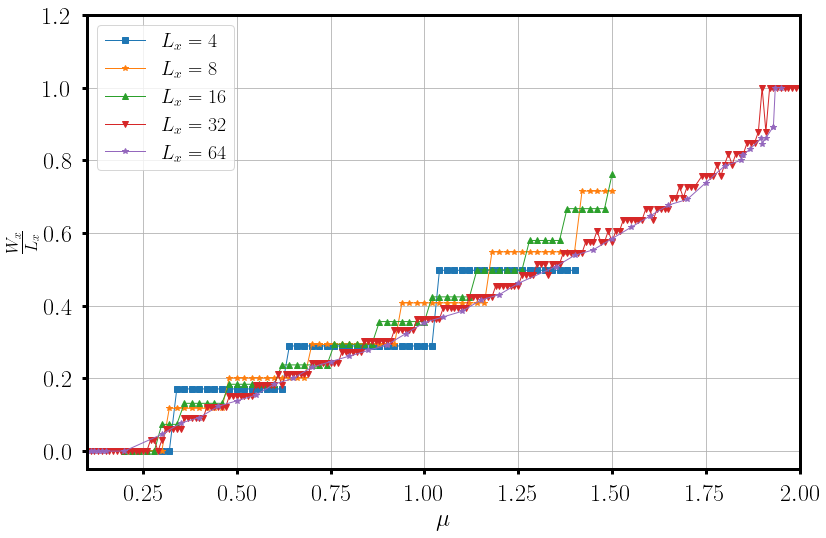

In [19]:
fig, ax1 = plt.subplots(1,figsize=(12,8))

#ax1.plot(L3mu, (L3Wind-L3Wind[0])/3, lw=1, marker='d', label= r'$L_x=3$')
ax1.plot(L4mu, (L4Wind-L4Wind[0])/5, lw=1, marker='s', label= r'$L_x=4$')
ax1.plot(L8mu, (L8Wind-L8Wind[0])/9, lw=1, marker='*', label= r'$L_x=8$')
#ax1.plot(L10mu, (L10Wind-L10Wind[0])/10, lw=1, marker='o', fillstyle='none', label= r'$L_x=10$')
#ax1.plot(L12mu, (L12Wind-L12Wind[0])/12, lw=1, marker='v', label= r'$L_x=12$')
ax1.plot(L16mu, (L16Wind-L16Wind[0])/17, lw=1, marker='^', label= r'$L_x=16$')
#ax1.plot(L20mu, L20Wind-L20Wind[0], lw=1, marker='+', label= r'$L_x=20$')
#ax1.plot(L24mu, L24Wind, lw=1, marker='*', label= r'$L_x=24$')
ax1.plot(L32mu, (L32Wind-L32Wind[0])/33, lw=1, marker='v', label= r'$L_x=32$')
ax1.plot(L64mu, (L64Wind-L64Wind[0])/65, lw=1, marker='*', label= r'$L_x=64$')


ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$\frac{W_x}{L_x}$')
ax1.set_xlim([0.1,2.0])
ax1.set_ylim([ax1.get_ylim()[0],1.2])
plt.grid()
ax1.legend(fontsize=20)
save_fig("imgs/winding_mu.eps")


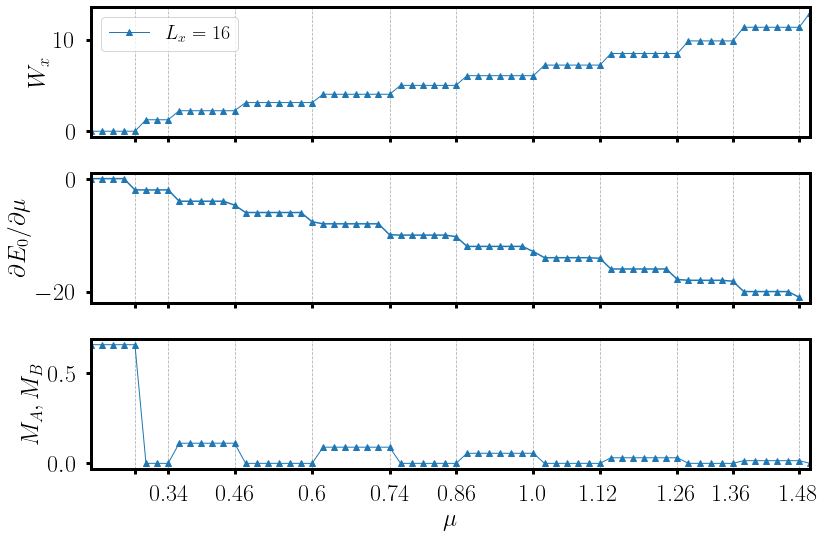

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,8),sharex=True)
jumps = np.diff(L16Wind); loc = jumps.nonzero(); 
diffWindingL16  = jumps[loc]; muCL16 = L16mu[loc]; L16eGS = L16energy[loc];
dmu = L16mu[2]-L16mu[1]
dEL16dmu = np.diff(L16energy)/dmu
#ax1.plot(L3mu, np.abs(L3MA)/3, lw=1, marker='+', label= r'$L_x=3$')
#ax1.plot(L4mu, np.abs(L4MA)/4, lw=1, marker='o', fillstyle='none', label= r'$L_x=4$')
#ax1.plot(L8mu, np.abs(L8MA)/8, lw=1, marker='s', label= r'$L_x=8$')
#ax1.plot(L10mu, np.abs(L10MA)/10, lw=1, marker='d',fillstyle='none', label= r'$L_x=10$')
#ax1.plot(L12mu, np.abs(L12MA)/12, lw=1, marker='1', label= r'$L_x=12$')
ax1.plot(L16mu, L16Wind-L16Wind[0], lw=1, marker='^', label= r'$L_x=16$')
ax3.plot(L16mu, np.abs(L16MA)/16, lw=1, marker='^', label= r'$L_x=16$')
ax2.plot(L16mu[:-1], dEL16dmu,marker='^', label= r'$L_x=16$')
#ax1.plot(L20mu, L20Wind, lw=1, marker='+', label= r'$L_x=20$')
#ax1.plot(L24mu, L24Wind, lw=1, marker='*', label= r'$L_x=24$')

ax3.set_xlabel(r'$\mu$')
ax3.set_ylabel(r'$M_A, M_B$')
ax1.set_ylabel(r'$W_x$')
ax2.set_ylabel(r'$\partial E_0/\partial \mu$')
ax2.set_xlim([0.2,1.5])
ax1.set_xlim([0.2,1.5])
ax1.set_xticks(muCL16)
ax2.set_xticks(muCL16)
ax3.set_xticks(muCL16)
muCL16_label = [str(mu) for mu in muCL16]
muCL16_label[0] = ""
ax2.set_xticklabels(muCL16_label)
#ax1.set_ylim([6,21])
ax1.grid(axis="x", linestyle='--')
ax2.grid(axis="x", linestyle='--')
ax3.grid(axis="x", linestyle='--')
ax1.legend(fontsize=20,loc="upper left",bbox_to_anchor=(0.0,1))
#ax2.legend(fontsize=20,loc="upper left",bbox_to_anchor=(0.08,1))

save_fig("imgs/winding_sectors.eps",strict=True)

In [21]:
# L=3
jumps = np.diff(L3Wind); loc = jumps.nonzero(); 
diffWindingL3  = jumps[loc]; muCL3 = L3mu[loc]; L3eGS = L3energy[loc];
# L=4
jumps = np.diff(L4Wind); loc = jumps.nonzero(); 
diffWindingL4  = jumps[loc]; muCL4 = L4mu[loc]; L4eGS = L4energy[loc];
# L=8
jumps = np.diff(L8Wind); loc = jumps.nonzero(); 
diffWindingL8  = jumps[loc]; muCL8 = L8mu[loc]; L8eGS = L8energy[loc];
# L=10
jumps = np.diff(L10Wind); loc = jumps.nonzero(); 
diffWindingL10  = jumps[loc]; muCL10 = L10mu[loc]; L10eGS = L10energy[loc];
# L=12
jumps = np.diff(L12Wind); loc = jumps.nonzero(); 
diffWindingL12  = jumps[loc]; muCL12 = L12mu[loc]; L12eGS = L12energy[loc];
# L=16
jumps = np.diff(L16Wind); loc = jumps.nonzero(); 
diffWindingL16  = jumps[loc]; muCL16 = L16mu[loc]; L16eGS = L16energy[loc];

In [22]:

df_0_291=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu0.291/result.cvs",delimiter="  ")
df_0_313=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu0.313/result.cvs",delimiter="  ",engine='python')
df_0_319=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu0.319/result.cvs",delimiter="  ")
df_1_28=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.28/result.cvs",delimiter="  ")
df_1_29=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.29/result.cvs",delimiter="  ")
df_1_3=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.3/result.cvs",delimiter="  ")
df_1_91=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.91/result.cvs",delimiter="  ")
df_1_92=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.92/result.cvs",delimiter="  ")
df_1_925=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.925/result.cvs",delimiter="  ")
df_1_93=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.93/result.cvs",delimiter="  ")

/home/pkrah/Software/miniconda3/envs/sPOD/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


/home/pkrah/develop/SquareIce/06_data/plot_utils.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


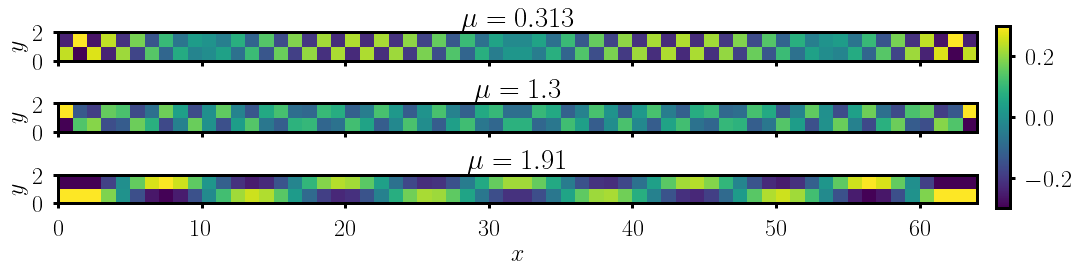

In [24]:
import matplotlib.gridspec as gridspec

Flipp_lattice_0_313 = np.column_stack([df_0_313["E_up"].values,df_0_313["E_bot"].values]).T
Flipp_lattice_1_3 = np.column_stack([df_1_3["E_up"].values,df_1_3["E_bot"].values]).T
Flipp_lattice_1_91 = np.column_stack([df_1_91["E_up"].values,df_1_91["E_bot"].values]).T

vmin = np.min([Flipp_lattice_0_313,Flipp_lattice_1_3,Flipp_lattice_1_91])*0.6
vmax = -vmin#np.max([Flipp_lattice_0_313,Flipp_lattice_1_3,Flipp_lattice_1_91])*0.6

h = [0,0,0]
fig,ax = plt.subplots(3,1,sharex=True,figsize=(20,4))
#fig.suptitle('Electric Field')
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
h[0]= ax[0].pcolormesh(Flipp_lattice_0_313[:,:-1],vmin=vmin,vmax=vmax)
ax[0].axis("image")
ax[0].set_title("$\mu=0.313$")
#ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")

h[1]=ax[1].pcolormesh(Flipp_lattice_1_3[:,:-1],vmin=vmin,vmax=vmax)
ax[1].axis("image")
ax[1].set_title("$\mu=1.3$")
#ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
h[2] = ax[2].pcolormesh(Flipp_lattice_1_91[:,:-1],vmin=vmin,vmax=vmax)
ax[2].axis("image")
ax[2].set_title("$\mu=1.91$")
ax[2].set_xlabel("$x$")
ax[2].set_ylabel("$y$")

fig.subplots_adjust(right=1.05)
cbar_ax = fig.add_axes([0.85, 0.25, 0.01, 0.63])
fig.colorbar(h[2], cax=cbar_ax)

save_fig("imgs/electric_fields.eps",strict=True)


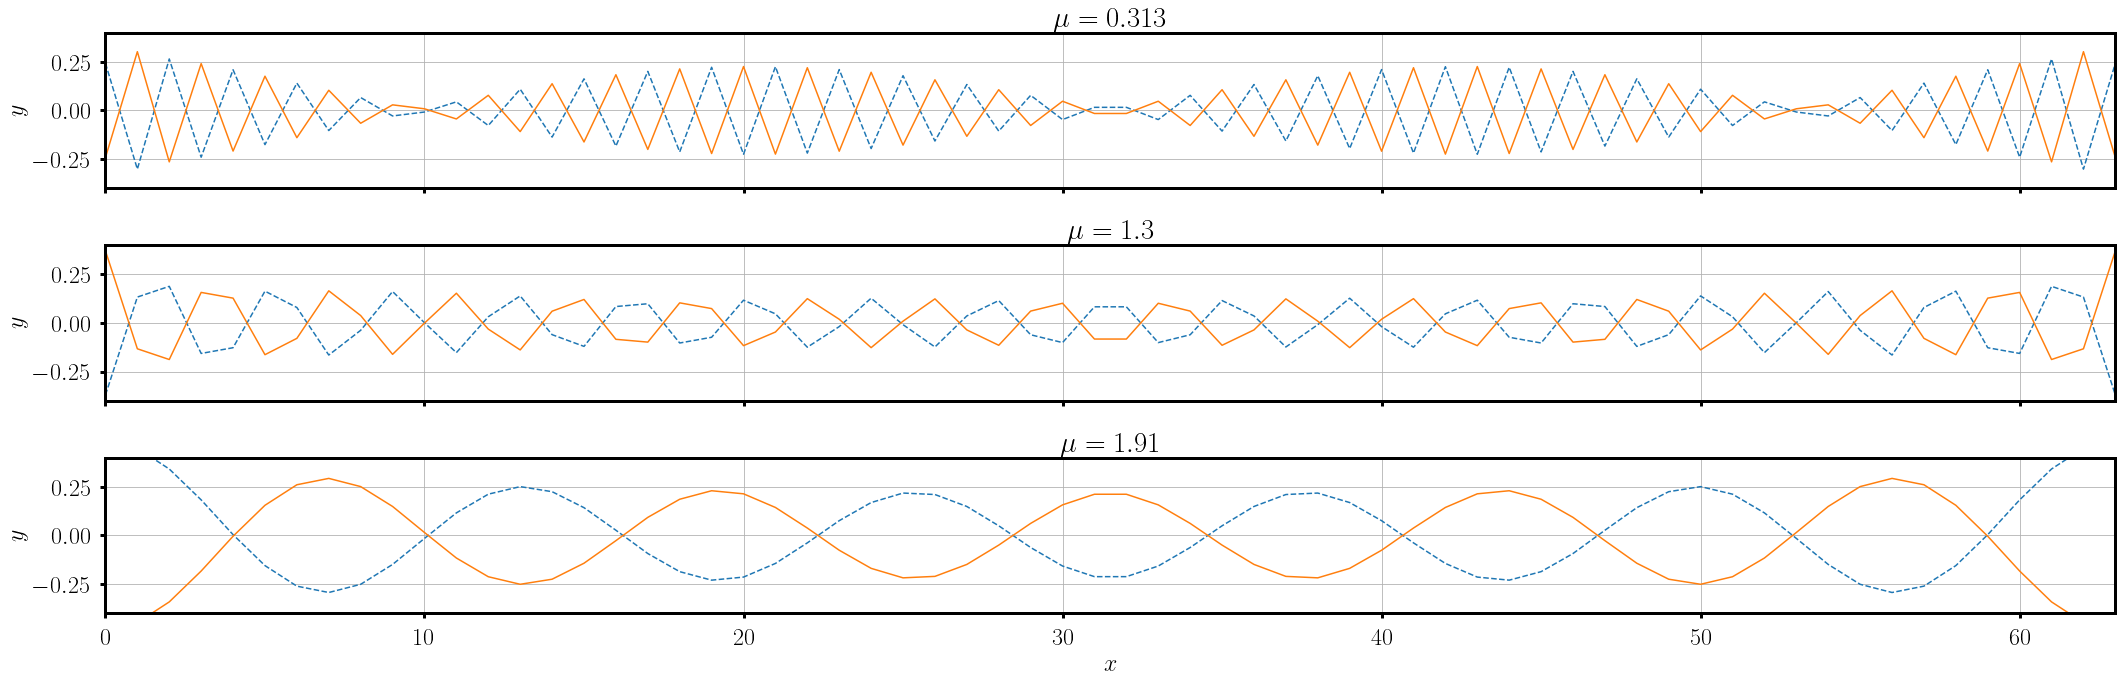

In [53]:
Flipp_lattice_0_313 = [df_0_313["E_up"].values,df_0_313["E_bot"].values]
Flipp_lattice_1_3 = np.column_stack([df_1_3["E_up"].values,df_1_3["E_bot"].values])
Flipp_lattice_1_91 = np.column_stack([df_1_91["E_up"].values,df_1_91["E_bot"].values])


h = [0,0,0]
fig,ax = plt.subplots(3,1,sharex=True,figsize=(30,10))
#fig.suptitle('Electric Field')
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
h[0]= ax[0].plot(df_0_313["E_up"].values,'--')
h[0]= ax[0].plot(df_0_313["E_bot"].values)
#ax[0].axis("image")
ax[0].set_title("$\mu=0.313$")
#ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")

h[1]=ax[1].plot(df_1_3["E_up"].values,'--')
h[1]=ax[1].plot(df_1_3["E_bot"].values)
#ax[1].axis("image")
ax[1].set_title("$\mu=1.3$")
#ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
h[2] = ax[2].plot(df_1_91["E_up"].values,'--')
h[2] = ax[2].plot(df_1_91["E_bot"].values)
#ax[2].axis("image")
ax[2].set_title("$\mu=1.91$")
ax[2].set_xlabel("$x$")
ax[2].set_ylabel("$y$")

for a in ax:
    a.set_xlim([0,63])
    a.set_ylim([-0.4,0.4])
    a.grid()


save_fig("imgs/electric_fields.eps",strict=True)

Text(0, 0.5, '$y$')

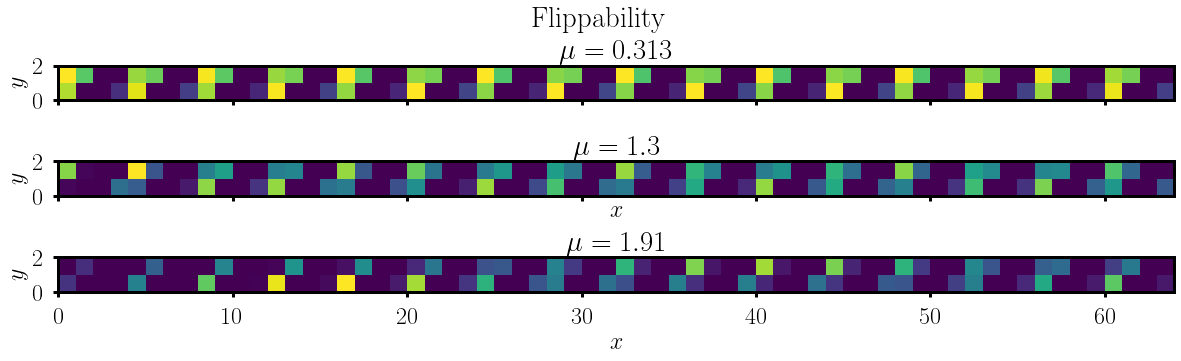

In [148]:
Flipp_lattice_0_313 = np.column_stack([df_0_313["flipp_up"].values,df_0_313["flipp_bot"].values]).T
Flipp_lattice_1_3 = np.column_stack([df_1_3["flipp_up"].values,df_1_3["flipp_bot"].values]).T
Flipp_lattice_1_91 = np.column_stack([df_1_91["flipp_up"].values,df_1_91["flipp_bot"].values]).T

fig,ax = plt.subplots(3,1,figsize=(20,5),sharex=True)
fig.suptitle('Flippability')
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
ax[0].pcolormesh(Flipp_lattice_0_313[:,:-1])
ax[0].axis("image")
ax[0].set_title("$\mu=0.313$")
#ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")

ax[1].pcolormesh(Flipp_lattice_1_3[:,:-1])
ax[1].axis("image")
ax[1].set_title("$\mu=1.3$")
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
ax[2].pcolormesh(Flipp_lattice_1_91[:,:-1])
ax[2].axis("image")
ax[2].set_title("$\mu=1.91$")
ax[2].set_xlabel("$x$")
ax[2].set_ylabel("$y$")

Text(0.5, 0, '$x$')

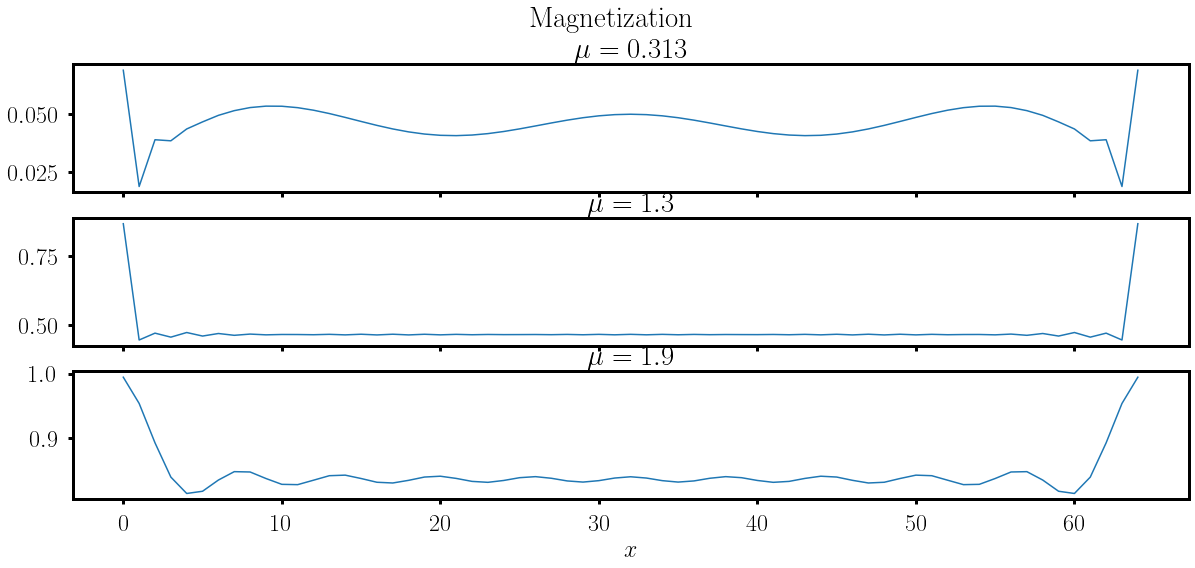

In [243]:
Flipp_lattice_0_313 = np.column_stack([df_0_313["E_up"].values,df_0_313["E_bot"].values]).T
Flipp_lattice_1_3 = np.column_stack([df_1_3["E_up"].values,df_1_3["E_bot"].values]).T
Flipp_lattice_1_91 = np.column_stack([df_1_91["E_up"].values,df_1_91["E_bot"].values]).T

fig,ax = plt.subplots(3,1,figsize=(20,8),sharex=True)
fig.suptitle('Magnetization')
ax[0].plot(df_0_313["mag"])
ax[0].set_title("$\mu=0.313$")

ax[1].plot(df_1_3["mag"])
#ax[0].set_title("Magnetization")
ax[1].set_title("$\mu=1.3$")

ax[2].plot(df_1_91["mag"])
#ax[0].set_title("Magnetization")
ax[2].set_title("$\mu=1.9$")
ax[2].set_xlabel("$x$")


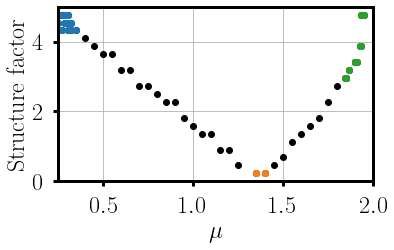

In [406]:
index_mu=[]
x_max=[]

for idx in df64.columns:
    signal=df64[idx][10:54]
    x=np.fft.fftshift(np.fft.fftfreq(len(signal),0.1),)[1:]
    y=np.abs(np.fft.fft(signal)[1:])
    max_y=np.max(y[x>0])
    X_positive=x[x>0]
    Y_positive=y[x>0]
    #print(X_positive[Y_positive==max_y])
    
    #plt.plot(np.fft.fftshift(np.fft.fftfreq(len(signal),0.1),)[1:], np.abs(np.fft.fft(signal)[1:]))
    #if np.asarray(y).flatten()[0]< 0.8:
    #plt.plot(x,y)
    #plt.scatter(X_positive[Y_positive==max_y],max_y,marker="o",color="k")
    index_mu.append(idx)
    x_max.append(X_positive[Y_positive==max_y])

index_mu = np.asarray(index_mu)  
x_max = np.asarray(x_max)
idx_sort = np.argsort(index_mu)

mus_sort=index_mu[idx_sort]
x_max = x_max[idx_sort]


h4 = plt.plot(mus_sort,x_max,'ko')

regime1 =  (mus_sort < 0.4)
h1=plt.plot(mus_sort[regime1],x_max[regime1],'o')

regime2 = (1.25 < mus_sort) & (mus_sort < 1.45)
h2=plt.plot(mus_sort[regime2],x_max[regime2],'o')

regime3 = mus_sort>1.8
h3=plt.plot(mus_sort[regime3],x_max[regime3],'o')

plt.xlim([0.25,2])
plt.xlabel("$\mu$")
plt.ylabel("Structure factor")

xdata=np.asarray(index_mu).flatten()
ydata=np.asarray(x_max).flatten()

arr1inds = xdata.argsort()
xdata = xdata[arr1inds[::-1]]
ydata = ydata[arr1inds[::-1]]
plt.grid()
save_fig("imgs/structure_factor.eps",strict=True)


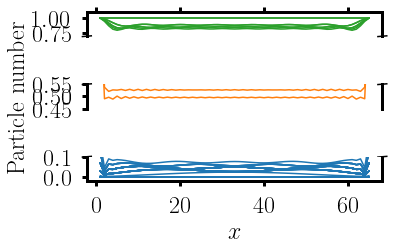

In [409]:


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2


# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2, ax3) = plt.subplots(3, 1)

# plot the same data on both axes
for idx in df64.columns:
    #print(idx)
    if idx<0.4:
        ax3.plot(df64[idx],label=r"$\mu=${}".format(idx),color=h1[0].get_color())
    if idx>1.25 and idx<1.45:
        ax2.plot(df64[idx],label=r"$\mu=${}".format(idx),color=h2[0].get_color())
    if idx> 1.85:
        ax.plot(df64[idx],label=r"$\mu=${}".format(idx),color=h3[0].get_color())
#ax.plot(pts)
#ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(0.7, 1.1)  # outliers only
ax3.set_ylim(-0.02, 0.1)  # outliers only
ax2.set_ylim(0.45, .55)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
#ax2.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',         # ticks along the top edge are off
#    labelbottom='off'  # labels along the bottom edge are off)
#)
ax.xaxis.tick_top()
#ax.tick_params(bottom='off',labelbottom="off")  # don't put tick labels at the top
ax3.xaxis.tick_bottom()
ax.tick_params(labelbottom=False)
ax.tick_params(labeltop=False)
ax2.tick_params(labelbottom=False)
ax2.xaxis.tick_bottom()
ax2.set_xticks([])
# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
plt.xlabel("$x$")
ax2.set_ylabel("Particle number")

save_fig("imgs/particle_number.eps",strict=True)
plt.show()

[0.01   0.02   0.03   0.04   0.05   0.06   0.07   0.08   0.09   0.1
 0.11   0.12   0.13   0.14   0.15   0.16   0.17   0.18   0.19   0.2
 0.21   0.22   0.23   0.24   0.25   0.26   0.27   0.28   0.281  0.282
 0.283  0.284  0.285  0.286  0.287  0.288  0.289  0.29   0.291  0.292
 0.293  0.294  0.295  0.296  0.297  0.298  0.299  0.3    0.301  0.302
 0.303  0.304  0.305  0.306  0.307  0.308  0.309  0.31   0.311  0.312
 0.313  0.314  0.315  0.316  0.317  0.318  0.319  0.35   0.4    0.45
 0.5    0.55   0.6    0.65   0.7    0.75   0.8    0.85   0.9    0.95
 1.     1.05   1.1    1.15   1.2    1.25   1.35   1.4    1.45   1.5
 1.55   1.6    1.65   1.7    1.75   1.8    1.8435 1.8475 1.85   1.8675
 1.8975 1.9    1.91   1.9295 1.93   1.935  1.95  ]


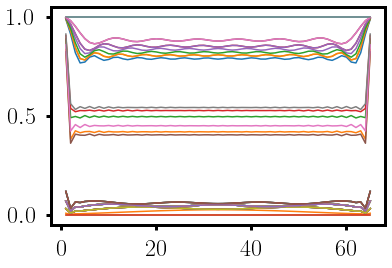

In [360]:
for idx in df64.columns:
    #print(idx)
    if idx>0.28 and idx<0.35:
        plt.plot(df64[idx],label=r"$\mu=${}".format(idx))
    if idx>1.1 and idx<1.5:
        plt.plot(df64[idx],label=r"$\mu=${}".format(idx))
    if idx> 1.8:
        plt.plot(df64[idx],label=r"$\mu=${}".format(idx))
print(np.sort(df64.columns))

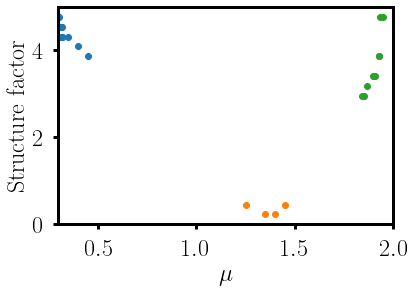